In [1]:
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F

# Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from torchvision import datasets
from torch.utils.data import sampler
batch_size = 256
lr = 1e-3
n_epoch = 100
train_loader = DataLoader(
    datasets.ImageFolder('/datasets/CelebA-stargan', transforms.Compose([
        transforms.CenterCrop((128,128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # 用均值和方差归一化图片
    ])),
    batch_size=batch_size, shuffle=False,
    num_workers=32,pin_memory=True)

In [3]:
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(16384 * 3, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 20),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 16384 * 3),
            nn.LeakyReLU(negative_slope=0.01)
        )
    def forward(self,x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder, decoder

model = AutoEncoder().to(device)

In [4]:
criterion = nn.MSELoss(reduction = 'mean').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
epoch = 100
losses= []

In [5]:
from torch.autograd import Variable
import numpy as np

for e in range(epoch):
    for in_data, _ in train_loader:
        in_data = in_data.view(in_data.shape[0], -1).to(device)
        in_data = Variable(in_data)
        _, out_data = model(in_data)
        
        loss = criterion(out_data, in_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print('epoch is: {}, Loss is:{:.4f}'.format(e + 1, loss.data))

epoch is: 1, Loss is:0.3290
epoch is: 2, Loss is:0.3234
epoch is: 3, Loss is:0.4202
epoch is: 4, Loss is:0.3145
epoch is: 5, Loss is:0.3154
epoch is: 6, Loss is:0.3132
epoch is: 7, Loss is:0.3081
epoch is: 8, Loss is:0.3054
epoch is: 9, Loss is:0.3029
epoch is: 10, Loss is:0.3012
epoch is: 11, Loss is:0.3012
epoch is: 12, Loss is:0.2990
epoch is: 13, Loss is:0.2978
epoch is: 14, Loss is:0.2962
epoch is: 15, Loss is:0.2951
epoch is: 16, Loss is:0.2937
epoch is: 17, Loss is:0.2916
epoch is: 18, Loss is:0.2869
epoch is: 19, Loss is:0.2721
epoch is: 20, Loss is:0.2662
epoch is: 21, Loss is:0.2560
epoch is: 22, Loss is:0.2375
epoch is: 23, Loss is:0.2695
epoch is: 24, Loss is:0.2424
epoch is: 25, Loss is:0.2640
epoch is: 26, Loss is:0.2587
epoch is: 27, Loss is:0.2448
epoch is: 28, Loss is:0.2430
epoch is: 29, Loss is:0.2365
epoch is: 30, Loss is:0.2362
epoch is: 31, Loss is:0.2293
epoch is: 32, Loss is:0.2247
epoch is: 33, Loss is:0.2233
epoch is: 34, Loss is:0.2202
epoch is: 35, Loss is:0

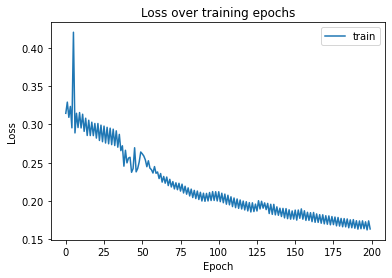

In [6]:
ax = plt.figure().gca()
ax.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.title('Loss over training epochs')
plt.show()